In [1]:
from autogluon.tabular import TabularPredictor

from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, f1_score, \
    precision_score, recall_score, top_k_accuracy_score, \
    confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")
sns.set_context("talk")
plt.rcParams['font.family'] = 'Arial'

## 1. Evaluate on test data for 4 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [2]:
class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    # 'S5',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [3]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.809972,accuracy,14.613075,2085.844203,0.002074,1.195055,2,True,36
1,LightGBMLarge_BAG_L1,0.806417,accuracy,0.862356,170.135494,0.862356,170.135494,1,True,13
2,LightGBM_r130_BAG_L1,0.804444,accuracy,0.494503,52.854817,0.494503,52.854817,1,True,31
3,LightGBM_r131_BAG_L1,0.803861,accuracy,0.799807,86.238754,0.799807,86.238754,1,True,16
4,LightGBM_r188_BAG_L1,0.803778,accuracy,1.145889,81.439485,1.145889,81.439485,1,True,27
5,XGBoost_r33_BAG_L1,0.803250,accuracy,1.186762,804.942551,1.186762,804.942551,1,True,21
6,LightGBM_BAG_L1,0.803222,accuracy,0.548597,63.498416,0.548597,63.498416,1,True,5
7,LightGBMXT_BAG_L1,0.802917,accuracy,0.904616,48.515529,0.904616,48.515529,1,True,4
8,LightGBM_r96_BAG_L1,0.802722,accuracy,3.544080,93.603437,3.544080,93.603437,1,True,19
9,XGBoost_r89_BAG_L1,0.802167,accuracy,0.664834,156.446809,0.664834,156.446809,1,True,29


In [4]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [5]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.8077
ROC_AUC: 0.9587
MCC: 0.7472
F1: 0.8028
Precision: 0.8092
Recall: 0.8077
Top-2 accuracy: 0.9838
Top-3 accuracy: 1.0000
Classification report:
              precision    recall  f1-score   support

          S1       0.83      0.97      0.90      1000
          S2       0.85      0.70      0.77      1000
          S3       0.79      0.66      0.72      1000
          S4       0.77      0.90      0.83      1000

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.80      4000
weighted avg       0.81      0.81      0.80      4000



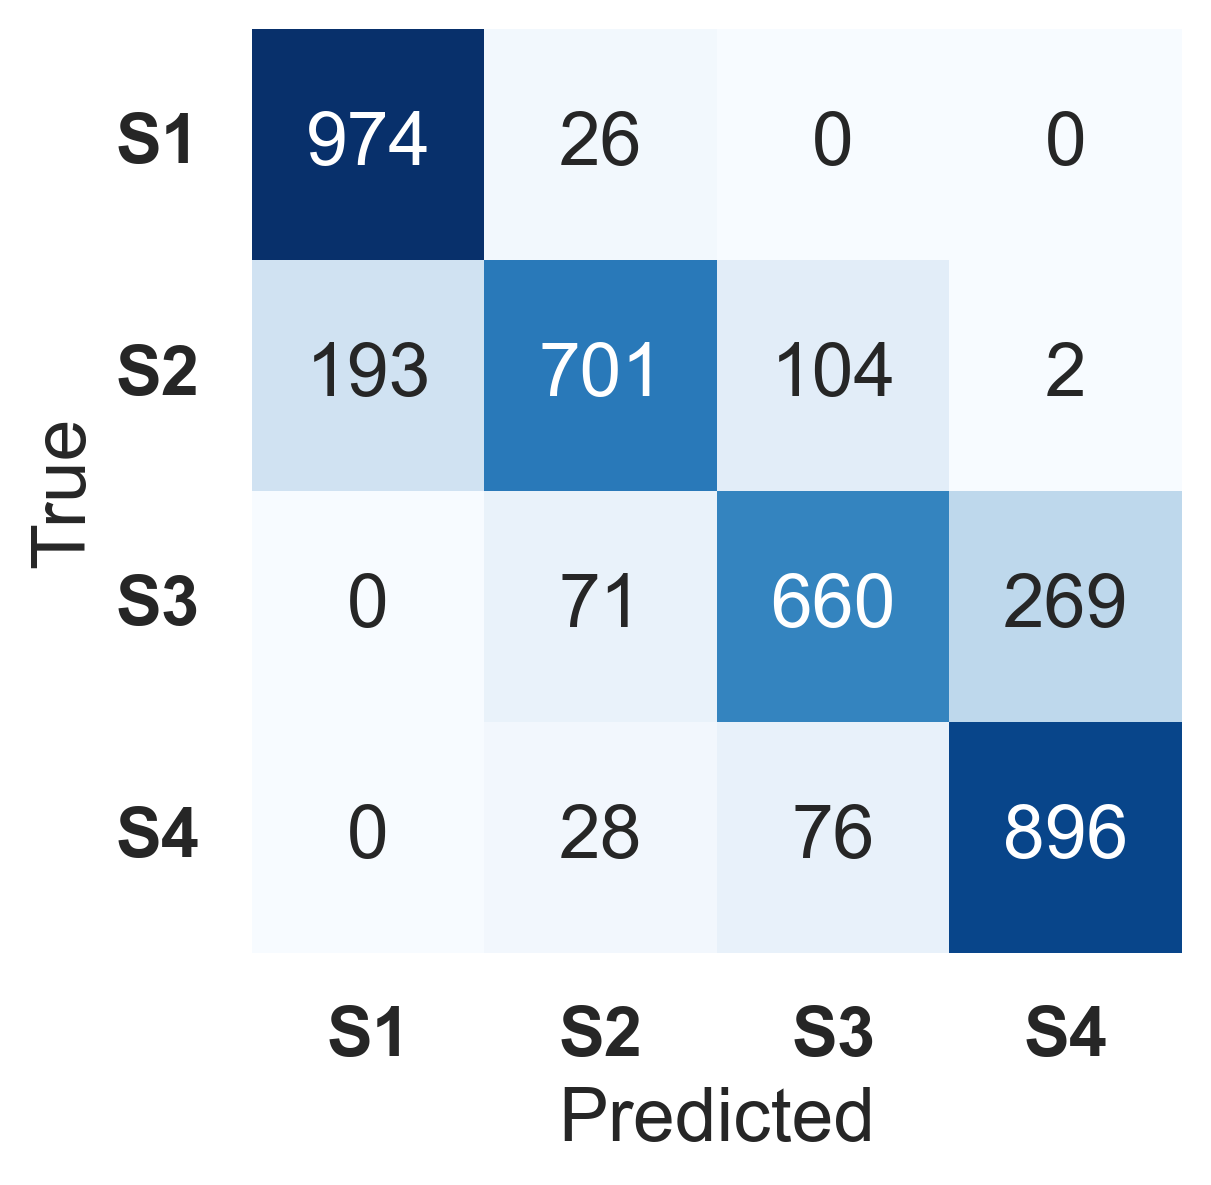

In [6]:
# show confusion matrix
plt.figure(figsize=(4, 4), dpi=300)
# plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 5:
    class_list = ['S1', 'S2', 'S3', 'S4', 'S5']
plt.xticks(tick_marks, class_list, rotation=0, fontweight='bold')
plt.yticks(tick_marks, class_list, rotation=0, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

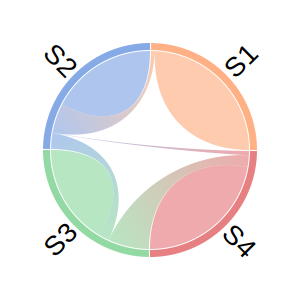

<Figure size 1800x1800 with 0 Axes>

In [7]:
# show chord diagram
import openchord as ocd

plt.figure(figsize=(6, 6), dpi=300)
fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 28

fig.colormap = ['#FFA878', '#79A1E3', '#88D59A', '#E37275']

fig.show()

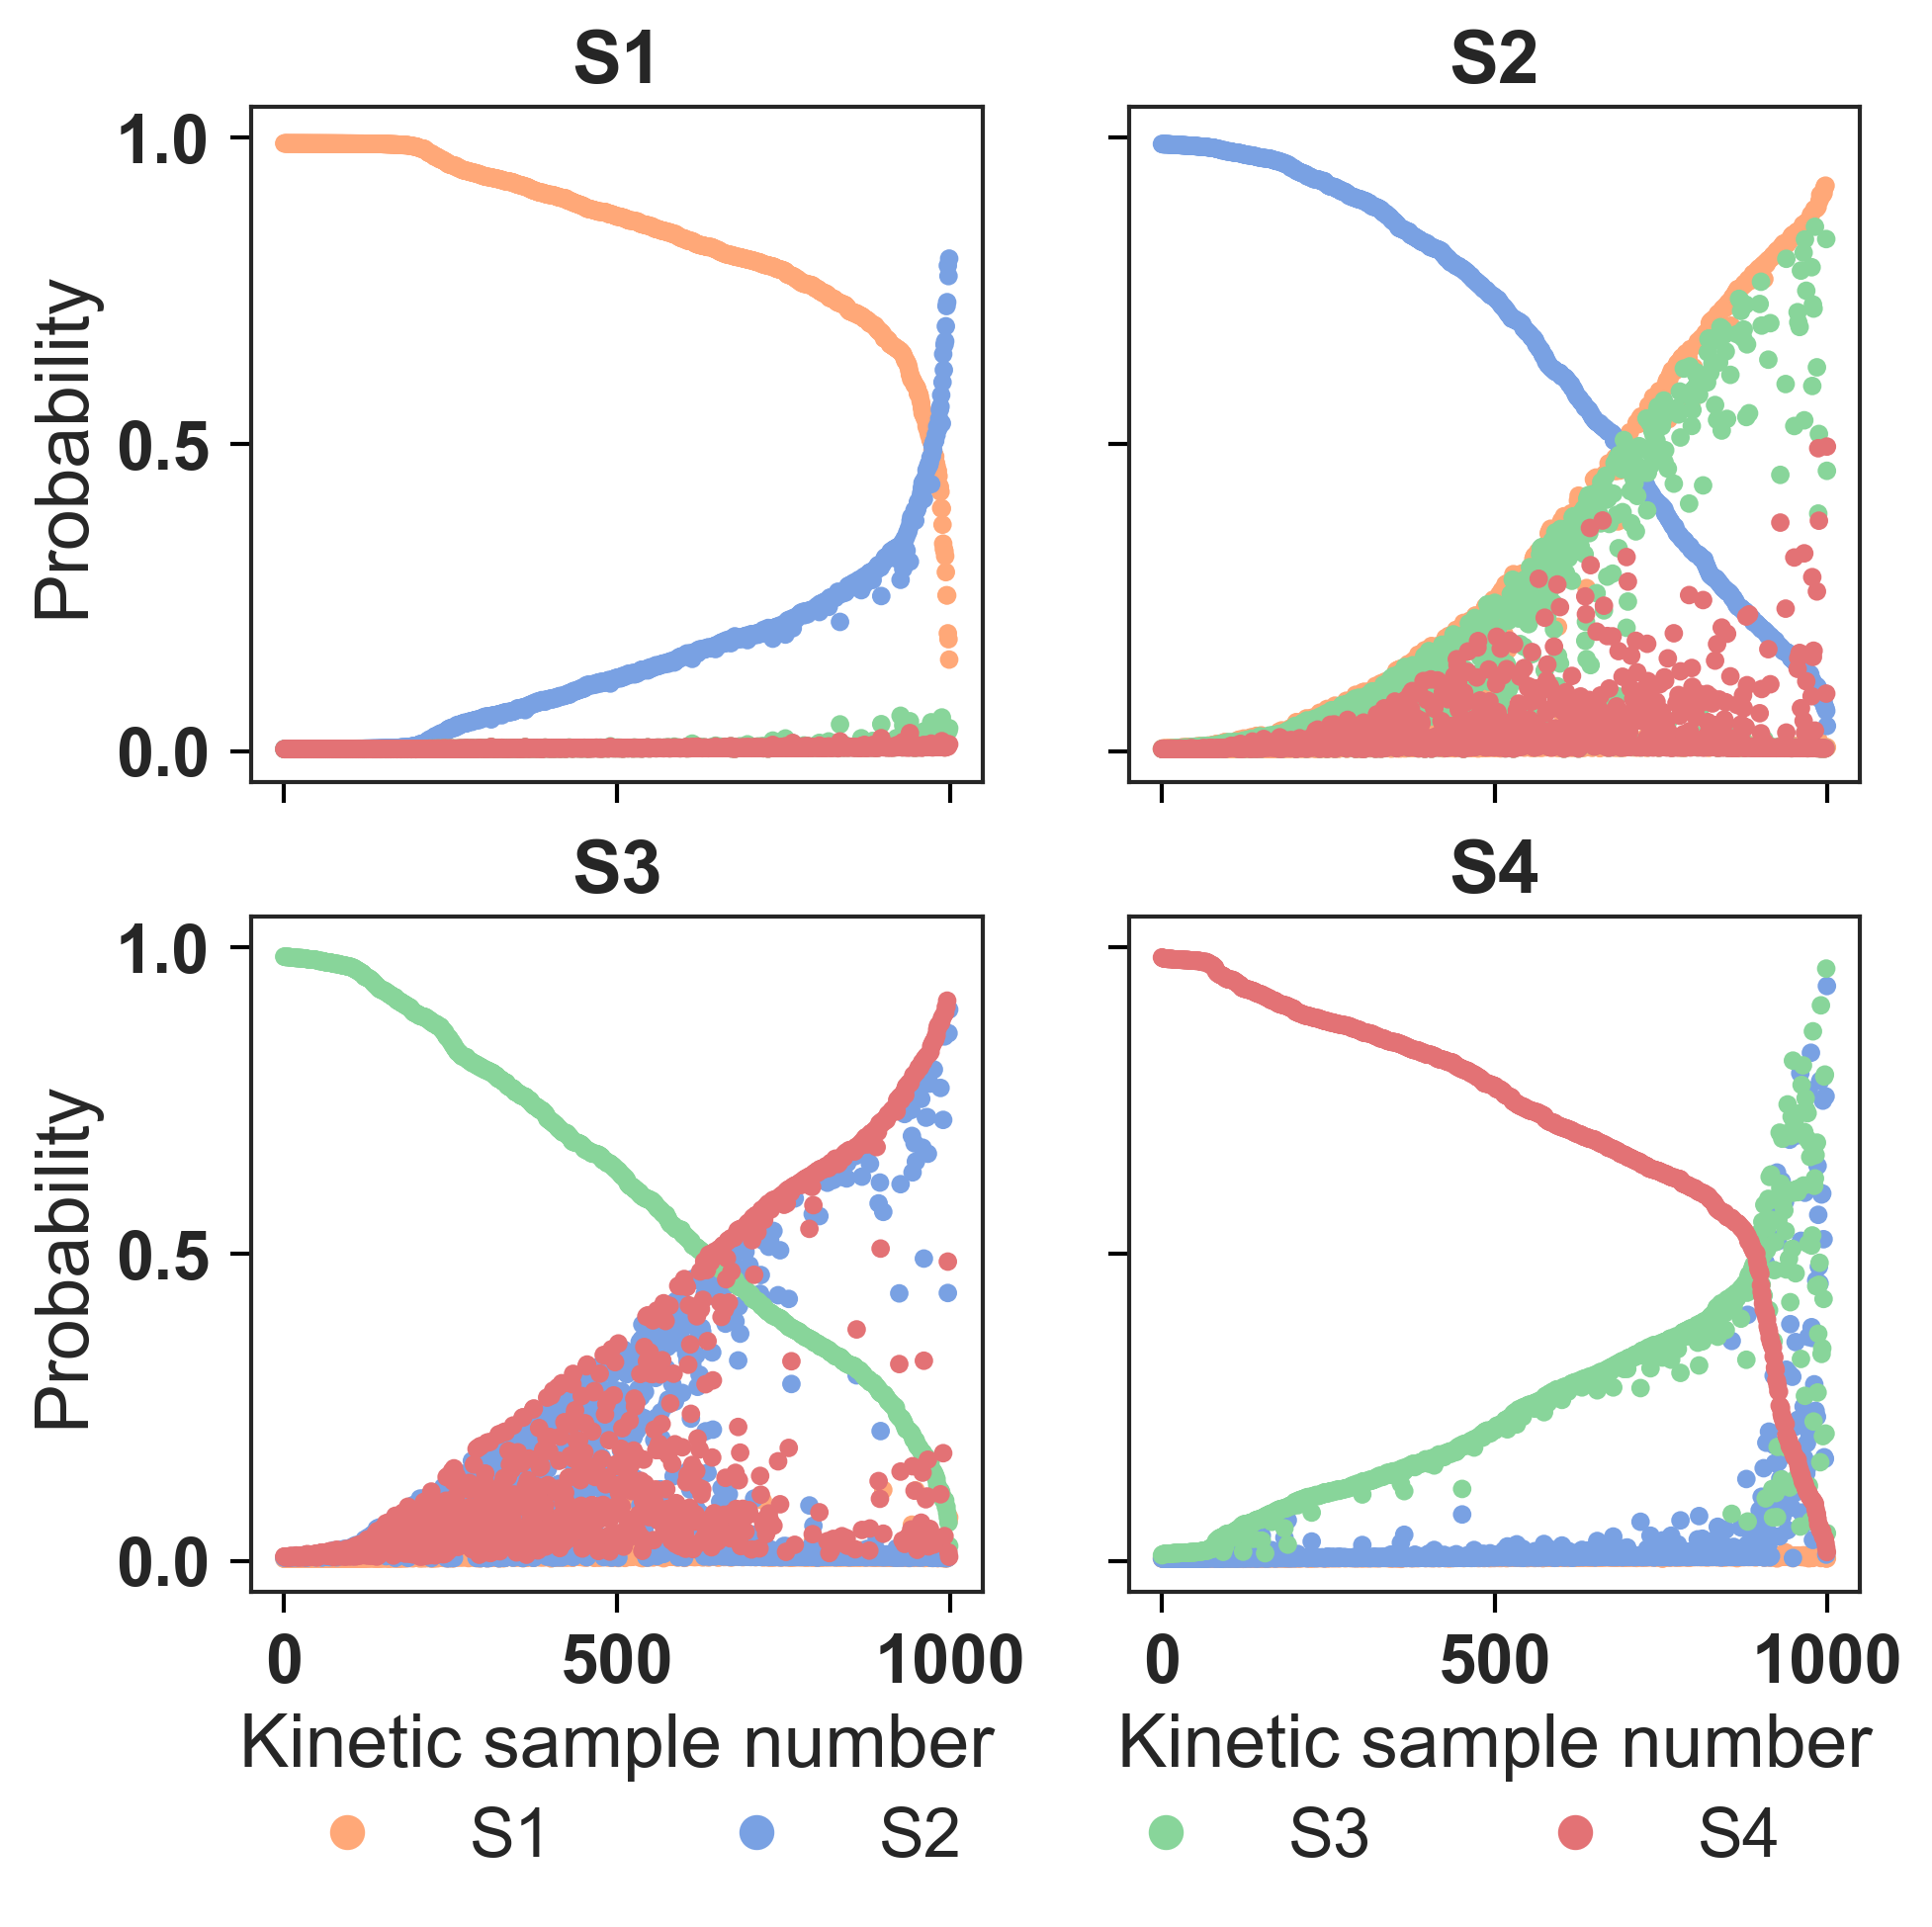

In [8]:
y_proba = y_proba[class_list]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['S1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['S2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['S3'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['S4'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')

# 4 figs
fig, axes = plt.subplots(2, 2, figsize=(7, 6.5), dpi=300)
axes = axes.flatten() 
from matplotlib.lines import Line2D

# S1
df_S1 = y_proba[y_proba['class'] == 'S1']
df_S1 = df_S1.sort_values(by=['S1', 'S2', 'S3', 'S4'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S1, axes[0])
axes[0].set_title('S1', fontweight='bold')

# S2
df_S2 = y_proba[y_proba['class'] == 'S2']
df_S2 = df_S2.sort_values(by=['S2', 'S3', 'S4', 'S1'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S2, axes[1])
axes[1].set_title('S2', fontweight='bold')

# S3
df_S3 = y_proba[y_proba['class'] == 'S3']
df_S3 = df_S3.sort_values(by=['S3', 'S4', 'S1', 'S2'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S3, axes[2])
axes[2].set_title('S3', fontweight='bold')

# S4
df_S4 = y_proba[y_proba['class'] == 'S4']
df_S4 = df_S4.sort_values(by=['S4', 'S1', 'S2', 'S3'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S4, axes[3])
axes[3].set_title('S4', fontweight='bold')

custom_handles = [
    Line2D([0], [0], color='#FFA878', marker='.', markersize=15, linestyle='none', label='S1'),
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=15, linestyle='none', label='S2'),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=15, linestyle='none', label='S3'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=15, linestyle='none', label='S4'),
]
fig.legend(
    handles=custom_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, 0.03),
    ncols=4,
    # fontsize=12,
    frameon=False
)

# plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.2)
# ylim
for ax in axes[:]:
    ax.set_ylim(-0.05, 1.05)

for ax_idx, ax in enumerate(axes):
    ax.set_ylabel('') # Clear all y-labels first
    # Bold xticks and yticks
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('bold')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('bold')
    for spine in ax.spines.values(): # ax.spines is a dictionary containing 'top', 'bottom', 'left', 'right'
        spine.set_linewidth(1) # Set line width to 1
    
    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=5,
        width=1,
        color='black',
        pad=5,
        bottom=True,  # Ensure ticks are drawn on the required edges
        left=True,    # Ensure ticks are drawn on the required edges
        top=False,    # Typically do not show ticks on the top and right
        right=False
    )

    if ax_idx % 2 == 1:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Probability')
    if ax_idx < 2:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Kinetic sample number')

## 2. Evaluate on test data for 5 class
- `sp_mode`: `s` (only use substrate concentration)
- `feat`: `tsfresh_raw` (use both tsfresh features and raw data)
- `ag_train_quality`: `best_quality` (use `best_quality` present in Autogluon training)
- `hours`: `3` (train for 3 hours)

In [9]:
class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
if feat == 'tsfresh':
    test_merge_data = test_tsfresh_data
elif feat == 'raw':
    test_merge_data = test_raw_data
elif feat == 'tsfresh_raw':
    test_raw_data.drop(columns=['class'], inplace=True)
    test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column

In [10]:
# load model
model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
predictor = TabularPredictor.load(model_root)
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.784044,accuracy,57.229679,5372.527379,0.448213,42.519552,2,True,26
1,WeightedEnsemble_L3,0.784044,accuracy,57.232140,5374.201600,0.002461,1.674222,3,True,46
2,LightGBM_r131_BAG_L2,0.783089,accuracy,57.194315,5396.411929,0.412849,66.404102,2,True,38
3,LightGBMLarge_BAG_L2,0.783000,accuracy,57.345798,5486.819659,0.564332,156.811832,2,True,35
4,XGBoost_r33_BAG_L2,0.782622,accuracy,58.059699,5538.102822,1.278233,208.094995,2,True,43
5,XGBoost_BAG_L2,0.782378,accuracy,58.004418,5526.785226,1.222952,196.777399,2,True,33
6,LightGBM_BAG_L2,0.782356,accuracy,57.171873,5378.381222,0.390407,48.373395,2,True,27
7,CatBoost_r9_BAG_L2,0.782156,accuracy,57.005039,5481.079834,0.223573,151.072007,2,True,40
8,LightGBM_r96_BAG_L2,0.781844,accuracy,57.241218,5355.598480,0.459752,25.590653,2,True,41
9,NeuralNetFastAI_r191_BAG_L2,0.781489,accuracy,58.671556,5782.916275,1.890090,452.908448,2,True,39


In [11]:
# predict on test data
y_pred = predictor.predict(test_merge_data_nolabel)
y_proba = predictor.predict_proba(test_merge_data_nolabel)

In [12]:
# show performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_proba, multi_class="ovr"):.4f}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred):.4f}')
print(f'F1: {f1_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted"):.4f}')
print(f'Top-2 accuracy: {top_k_accuracy_score(y_test, y_proba, k=2):.4f}')
print(f'Top-3 accuracy: {top_k_accuracy_score(y_test, y_proba, k=3):.4f}')
print('================================')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7842
ROC_AUC: 0.9617
MCC: 0.7321
F1: 0.7802
Precision: 0.7839
Recall: 0.7842
Top-2 accuracy: 0.9612
Top-3 accuracy: 0.9908
Classification report:
              precision    recall  f1-score   support

          S1       0.84      0.97      0.90      1000
          S2       0.71      0.67      0.69      1000
          S3       0.74      0.64      0.69      1000
          S4       0.75      0.89      0.82      1000
          S5       0.87      0.75      0.81      1000

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000



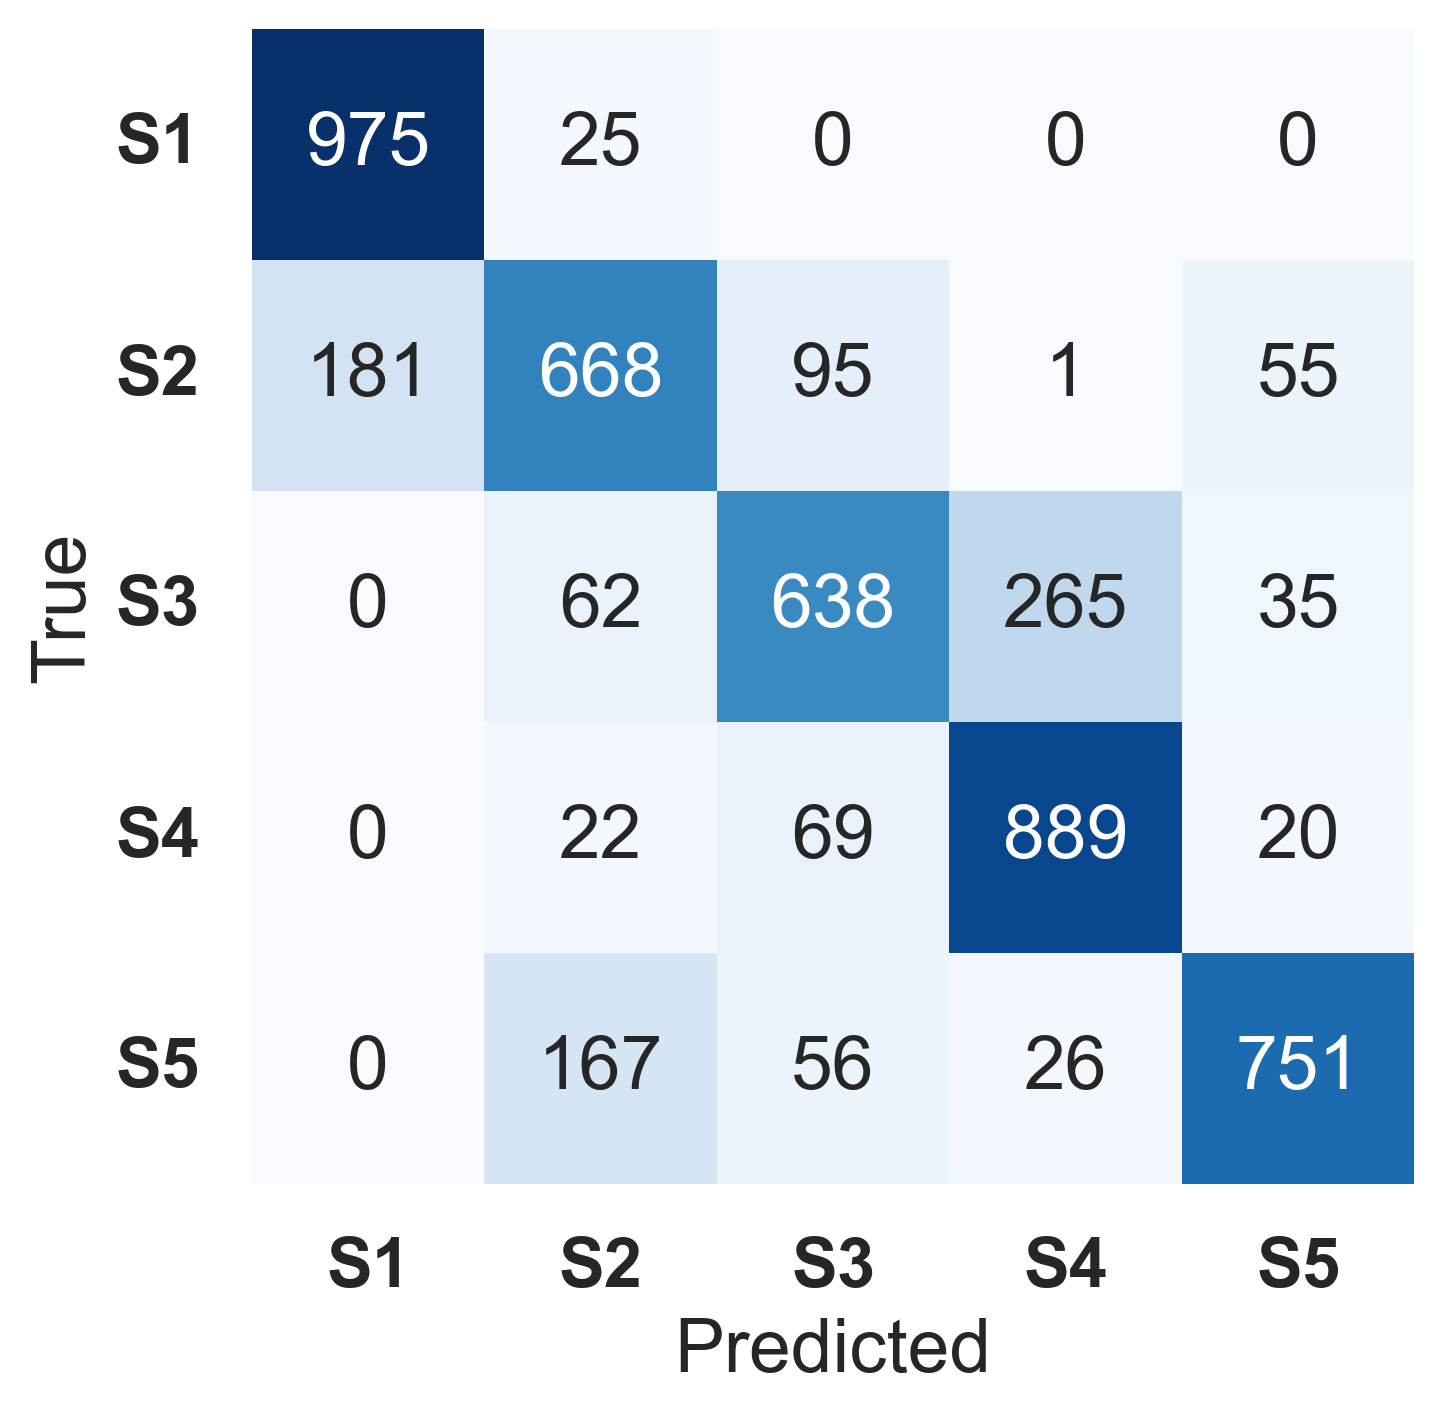

In [13]:
# show confusion matrix
plt.figure(figsize=(5, 5), dpi=300)
# plt.rcParams.update({'font.size': 20})
cm = confusion_matrix(y_test, y_pred, labels=class_list)
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, cbar=False)
tick_marks = np.arange(len(class_list)) + 0.5
if class_num == 5:
    class_list = ['S1', 'S2', 'S3', 'S4', 'S5']
plt.xticks(tick_marks, ['S1', 'S2', 'S3', 'S4', 'S5'], rotation=0, fontweight='bold')
plt.yticks(tick_marks, ['S1', 'S2', 'S3', 'S4', 'S5'], rotation=0, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title(f'Confusion Matrix of Prediction on Test Data', fontsize=17)
plt.show()

# plt.savefig(f'./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png', bbox_inches='tight')
# print(f'Confusion matrix saved at ./AutogluonModels/{str(class_num)}_class/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h/confusion_matrix.png')

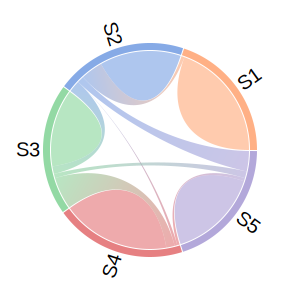

In [14]:
# show chord diagram
import openchord as ocd

fig = ocd.Chord(cm, class_list, radius=100)
fig.font_size = 20

fig.colormap = ['#FFA878', '#79A1E3', '#88D59A', '#E37275', '#AB9FD6']

fig.show()

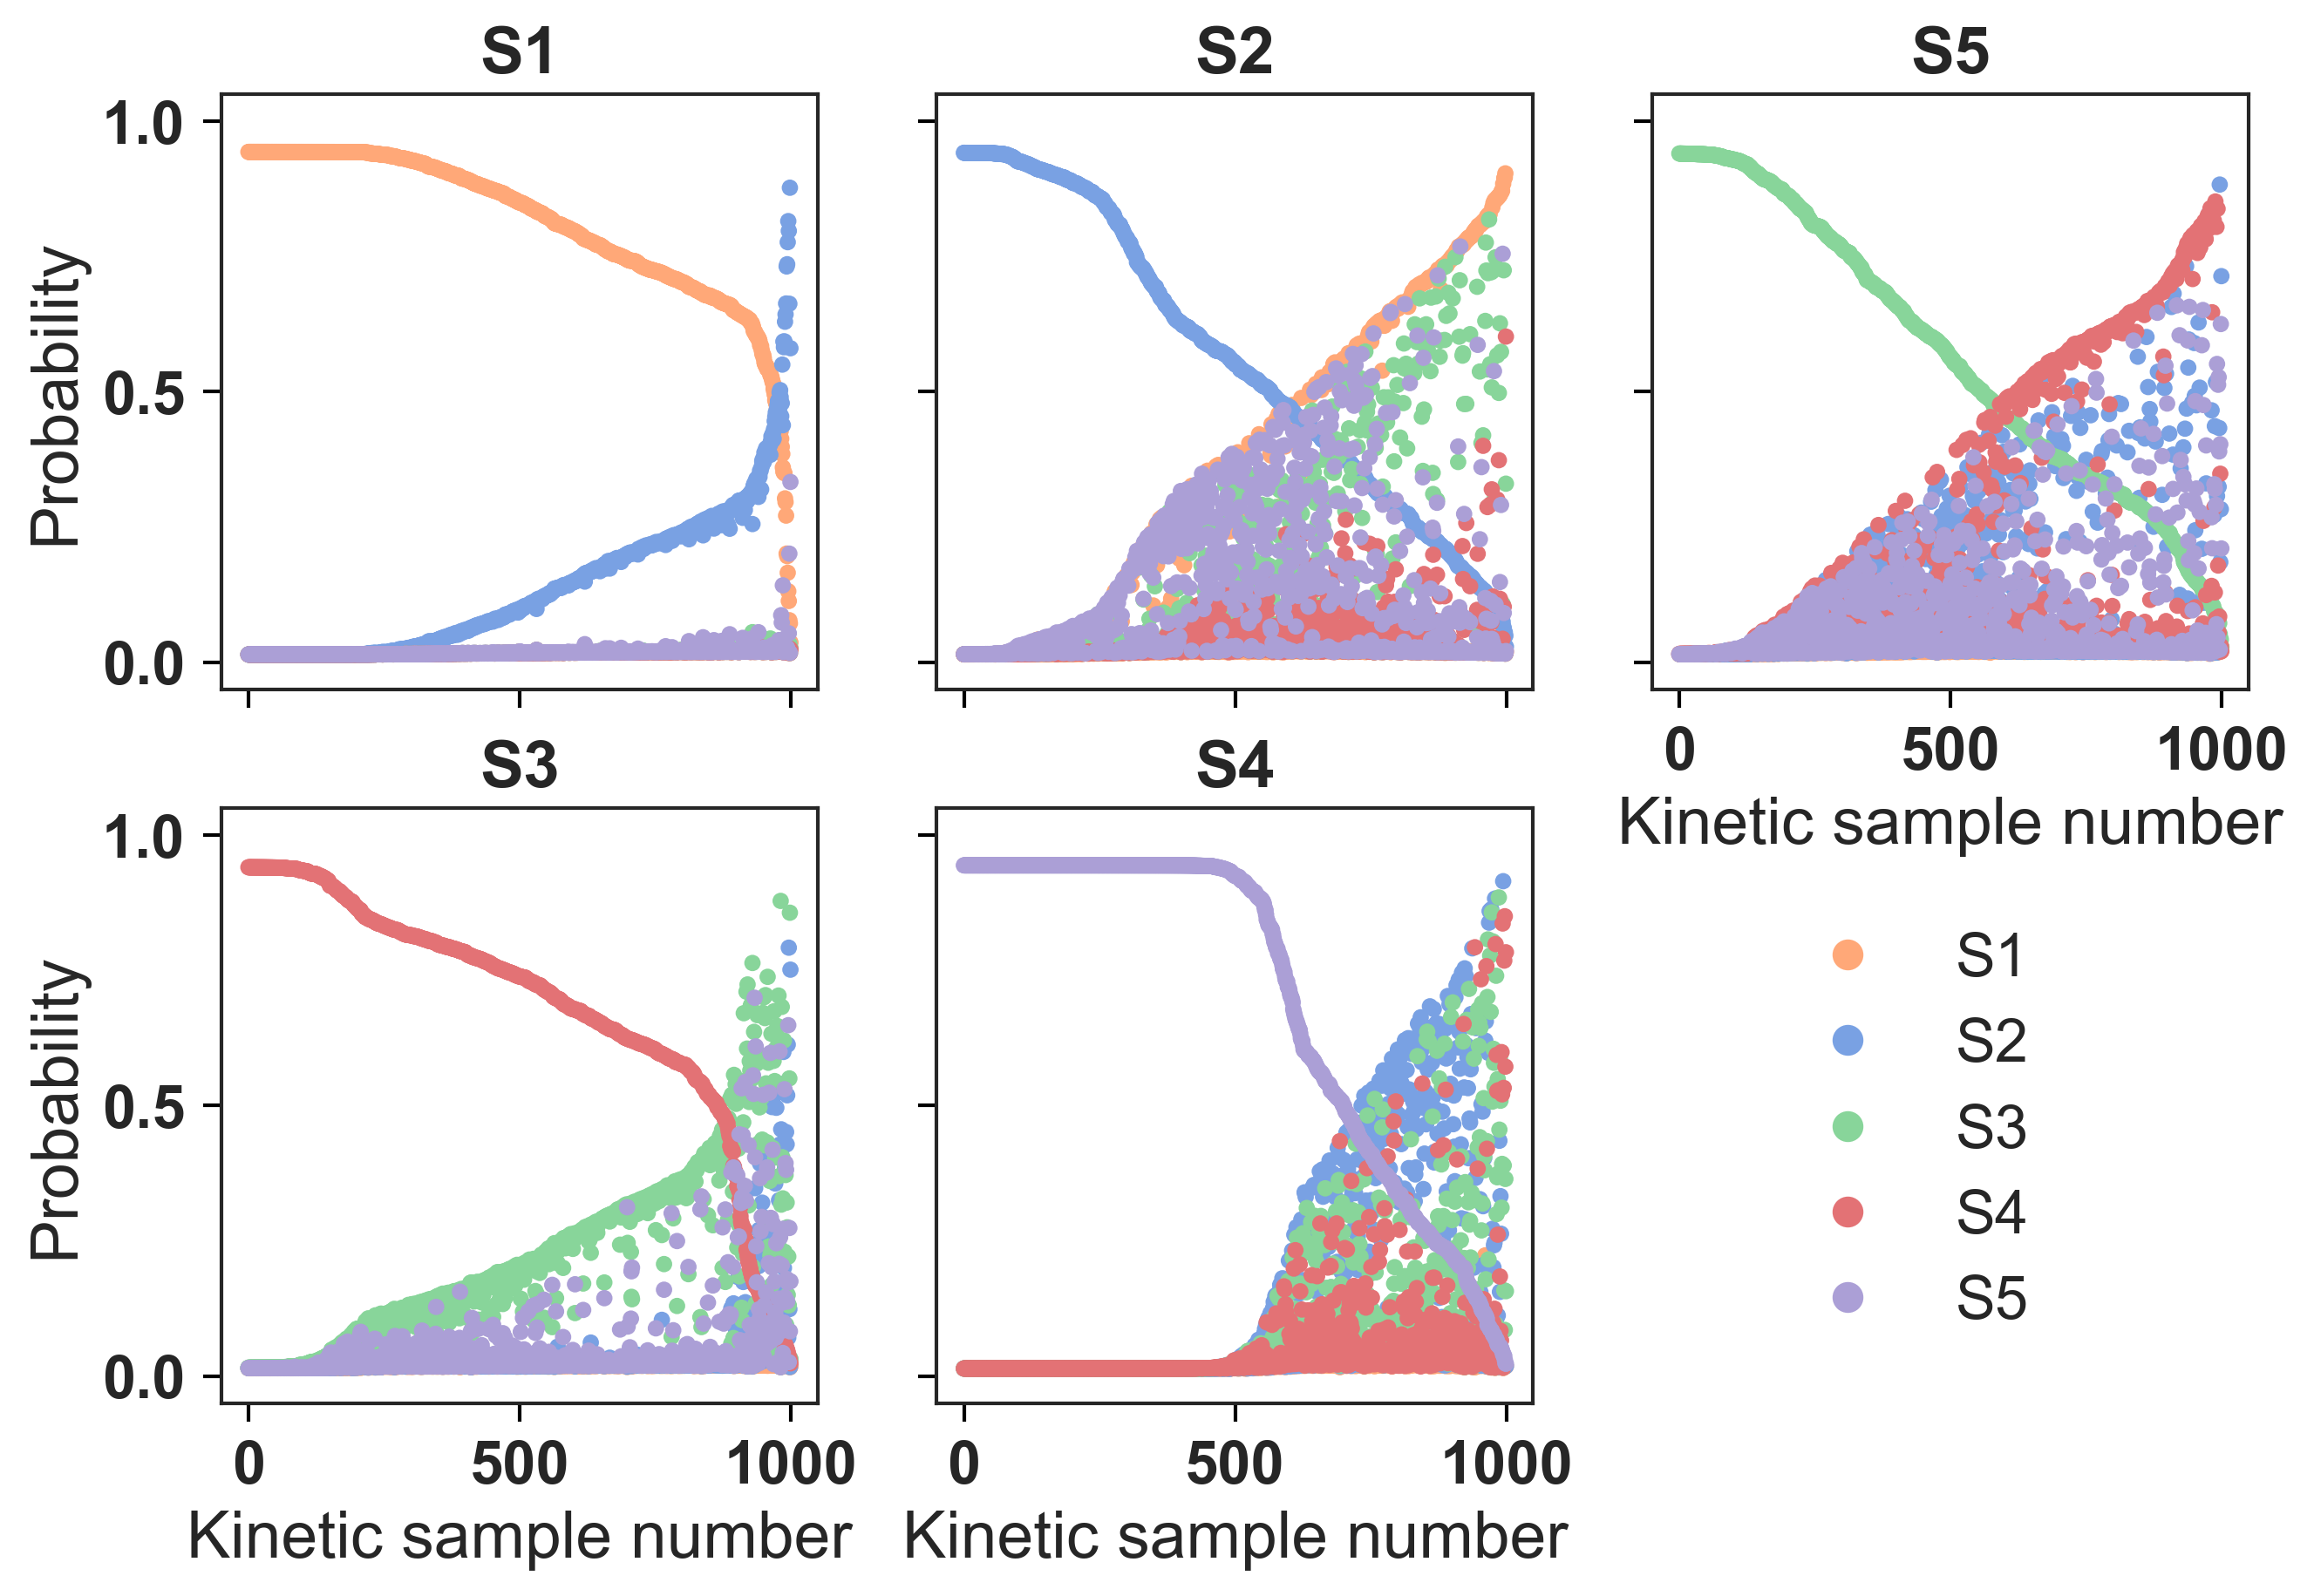

In [15]:
y_proba = y_proba[['S1', 'S2', 'S3', 'S4', 'S5']]
y_proba['class'] = test_merge_data['class']

def plot_scatter_figs(data, ax):
    sns.scatterplot(data=data['S1'], ax=ax, legend=False, marker='.', edgecolor='none', color='#FFA878')
    sns.scatterplot(data=data['S2'], ax=ax, legend=False, marker='.', edgecolor='none', color='#79A1E3')
    sns.scatterplot(data=data['S3'], ax=ax, legend=False, marker='.', edgecolor='none', color='#88D59A')
    sns.scatterplot(data=data['S4'], ax=ax, legend=False, marker='.', edgecolor='none', color='#E37275')
    sns.scatterplot(data=data['S5'], ax=ax, legend=False, marker='.', edgecolor='none', color='#AB9FD6')

# 6 figs
fig, axes = plt.subplots(2, 3, figsize=(10, 6.5), dpi=300)
axes = axes.flatten()
from matplotlib.lines import Line2D

# S1
df_S1 = y_proba[y_proba['class'] == 'S1']
df_S1 = df_S1.sort_values(by=['S1', 'S2', 'S3', 'S4', 'S5'], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S1, axes[0])
axes[0].set_title('S1', fontweight='bold')

# S2
df_S2 = y_proba[y_proba['class'] == 'S2']
df_S2 = df_S2.sort_values(by=['S2', 'S3', 'S4', 'S5', 'S1', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S2, axes[1])
axes[1].set_title('S2', fontweight='bold')

# S3
df_S3 = y_proba[y_proba['class'] == 'S3']
df_S3 = df_S3.sort_values(by=['S3', 'S4', 'S5', 'S1', 'S2', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S3, axes[2])
axes[3].set_title('S3', fontweight='bold')

# S4
df_S4 = y_proba[y_proba['class'] == 'S4']
df_S4 = df_S4.sort_values(by=['S4', 'S1', 'S2', 'S5', 'S3', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S4, axes[3])
axes[4].set_title('S4', fontweight='bold')

# S5
df_S5 = y_proba[y_proba['class'] == 'S5']
df_S5 = df_S5.sort_values(by=['S5', 'S4', 'S1', 'S2', 'S3', ], ascending=False).reset_index(drop=True)
plot_scatter_figs(df_S5, axes[4])
axes[2].set_title('S5', fontweight='bold')

axes[-1].axis('off')
custom_handles = [
    Line2D([0], [0], color='#FFA878', marker='.', markersize=15, linestyle='none', label='S1'),
    Line2D([0], [0], color='#79A1E3', marker='.', markersize=15, linestyle='none', label='S2'),
    Line2D([0], [0], color='#88D59A', marker='.', markersize=15, linestyle='none', label='S3'),
    Line2D([0], [0], color='#E37275', marker='.', markersize=15, linestyle='none', label='S4'),
    Line2D([0], [0], color='#AB9FD6', marker='.', markersize=15, linestyle='none', label='S5'),
]
fig.legend(
    handles=custom_handles,
    loc='center',
    bbox_to_anchor=(0.72, 0.22, 0.1, 0.1),
    # fontsize=15,
    frameon=False
)

# plt.subplots_adjust(hspace=0.4, wspace=0.3)
# ylim
for ax in axes:
    ax.set_ylim(-0.05, 1.05)
for ax_idx, ax in enumerate(axes):
    ax.set_ylabel('') # Clear all y-labels first
    # Bold the xticks and yticks
    for tick_label in ax.get_xticklabels():
        tick_label.set_fontweight('bold')
    for tick_label in ax.get_yticklabels():
        tick_label.set_fontweight('bold')
    # Set the border width to 1
    for spine in ax.spines.values(): # ax.spines is a dictionary containing 'top', 'bottom', 'left', 'right'
        spine.set_linewidth(1) # Set the line width to 1

    ax.tick_params(
        axis='both',
        which='major',
        direction='out',
        length=5,
        width=1,
        color='black',
        pad=5,
        bottom=True,  # Ensure ticks are drawn on the required edges
        left=True,    # Ensure ticks are drawn on the required edges
        top=False,    # Typically do not show ticks on the top and right
        right=False
    )
    if ax_idx % 3 != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Probability')
    if ax_idx < 2:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Kinetic sample number')

## 3. Benchmark with data size

### 3.1 using 4_class
- 4_class
- sp_mode: `s`
- feat: `tsfresh_raw`
- ag_train_quality: `medium_quality`
- hours: `0.2`

It may take ~40 minutes, or you can skip training and use our results in `data_efficiency_test_result.csv`

In [ ]:
# You can skip this cell and use our results in `data_efficiency_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'medium_quality'
hours = 0.2
label_col = 'class'
random_seed = 42

train_val_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val_tsfresh_feat.csv'))
train_val_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val.csv'))
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
train_val_raw_data.drop(columns=['class'], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
train_val_tsfresh_data.drop(columns=[c for c in train_val_tsfresh_data.columns if c.startswith('p')], inplace=True)
train_val_raw_data.drop(columns=[c for c in train_val_raw_data.columns if c.startswith('p')], inplace=True)
test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)

train_val_merge_data = pd.merge(train_val_tsfresh_data, train_val_raw_data, on='id')
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')

train_val_merge_data = train_val_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
test_merge_data = test_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
train_val_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)

train_val_merge_data.head()

,s__variance_larger_than_standard_deviation,s__has_duplicate_max,s__has_duplicate_min,s__has_duplicate,s__sum_values,s__abs_energy,s__mean_abs_change,s__mean_change,s__mean_second_derivative_central,s__median,...,s21,s22,s23,s24,s25,s26,s27,s28,s29,old_class
0,0.0,0.0,0.0,0.0,10.991128,7.478741,0.039446,-0.035813,0.001387,0.320011,...,0.002496,-0.011577,-0.004749,0.014949,0.024765,0.023351,-0.024784,-0.008451,-0.010141,mm__single
1,0.0,0.0,0.0,0.0,19.908932,14.130344,0.020334,-0.020334,0.000567,0.641477,...,0.528952,0.513297,0.494312,0.483399,0.460520,0.452160,0.439777,0.418946,0.414916,1__single
2,0.0,0.0,0.0,0.0,16.332701,10.359873,0.025846,-0.025846,0.000613,0.500789,...,0.367054,0.349935,0.333613,0.318052,0.303216,0.289072,0.275587,0.262731,0.250474,1__single
3,0.0,0.0,0.0,0.0,10.265027,5.692681,0.032621,-0.032621,0.001169,0.240310,...,0.139204,0.124191,0.107777,0.095836,0.085855,0.078186,0.076206,0.065619,0.051024,1__single
4,0.0,0.0,0.0,0.0,19.204635,13.610686,0.024445,-0.024445,0.000271,0.636656,...,0.481331,0.459946,0.439884,0.412349,0.385107,0.362804,0.342172,0.309591,0.291783,0__single


In [ ]:
# You can skip this cell and use our results in `data_efficiency_test_result.csv`

import warnings

warnings.filterwarnings("ignore", category=UserWarning)

all_data = pd.concat([train_val_merge_data, test_merge_data], ignore_index=True)
data_size_list = np.array([500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000])
print(data_size_list)
test_result_df = pd.DataFrame(columns=['Data_Size', 'Accuracy', 'MCC'])
repeat_num = 5
pbar = tqdm(total=len(data_size_list) * repeat_num)
for data_size in data_size_list:
    for repeat in range(repeat_num):
        try:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['old_class'], )[0]
        except ValueError:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['class'], )[0]
        try:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['old_class'], )
        except ValueError:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['class'], )
        # print(train_val_merge_data_.shape, test_merge_data_.shape)

        metric = 'accuracy'

        predictor = TabularPredictor(
            problem_type='multiclass',
            label=label_col,
            learner_kwargs={'ignored_columns': ['id', 'old_class']},
            eval_metric=metric,
            path=f'./AutogluonModels/{str(class_num)}_class/benchmark_data_size__{data_size}__{repeat}/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h',
            verbosity=0,
        ).fit(
            train_data=train_val_merge_data_,
            num_gpus=1,
            num_cpus=16,
            presets=ag_train_quality,
            time_limit=60*60*hours,
        )
        test_result = predictor.evaluate(test_merge_data_)
        test_result_df.loc[len(test_result_df)] = [data_size, test_result['accuracy'], test_result['mcc']]

        pbar.update(1)
    
test_result_df.to_csv(f'./AutogluonModels/{str(class_num)}_class/data_efficiency_test_result.csv', index=False)

In [10]:
# You can use our results in `data_efficiency_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)

test_result_df = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/data_efficiency_test_result.csv')
print(f'load {str(class_num)}_class data_efficiency_test_result.csv')
test_result_df

load 4_class data_efficiency_test_result.csv


,Data_Size,Accuracy,MCC
0,500.0,0.620000,0.500842
1,500.0,0.760000,0.692769
2,500.0,0.760000,0.683791
3,500.0,0.740000,0.656151
4,500.0,0.760000,0.692769
5,1000.0,0.750000,0.674353
6,1000.0,0.750000,0.674353
7,1000.0,0.750000,0.674353
8,1000.0,0.760000,0.688028
9,1000.0,0.750000,0.674353


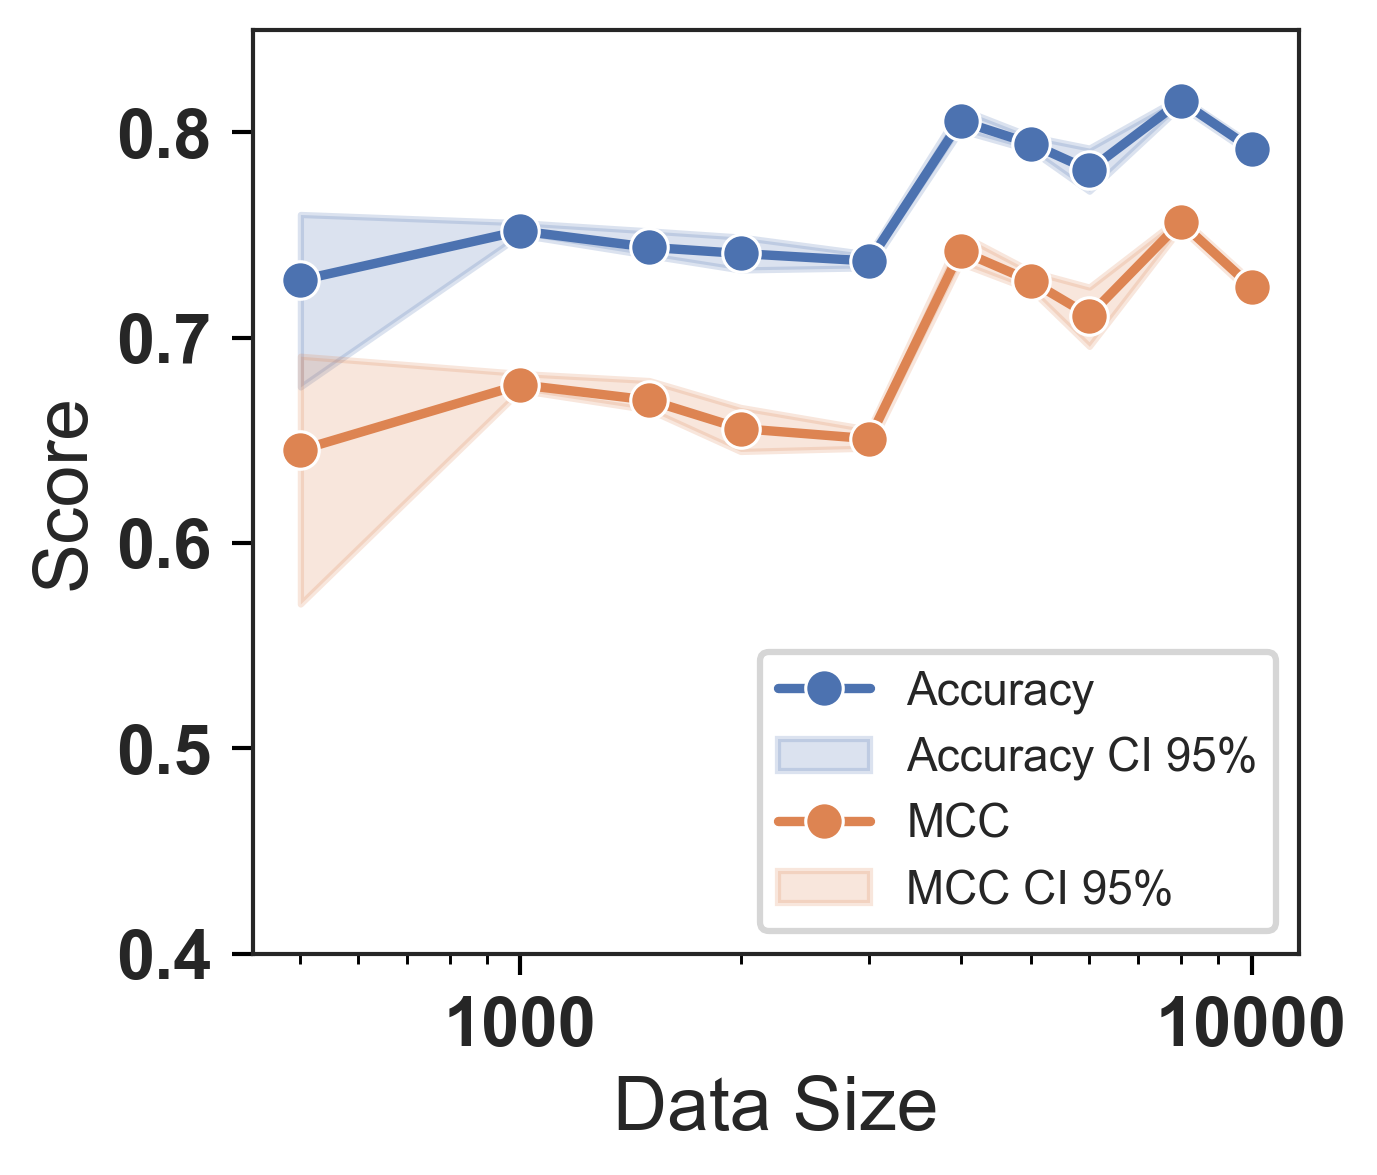

In [11]:
plt.figure(figsize=(4.5, 4), dpi=300)
sns.lineplot(data=test_result_df, x='Data_Size', y='Accuracy', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)
sns.lineplot(data=test_result_df, x='Data_Size', y='MCC', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)

plt.xscale('log')
plt.xlabel('Data Size')
plt.legend(['Accuracy', 'Accuracy CI 95%', 'MCC', 'MCC CI 95%'], loc='lower right', fontsize=11)
plt.ylim(0.4,0.85)
plt.ylabel('Score')
plt.xticks(ticks=[1000, 10000], labels=['1000', '10000'], fontweight='bold')
plt.yticks(ticks=[0.4, 0.5, 0.6, 0.7, 0.8], labels=['0.4', '0.5', '0.6', '0.7', '0.8'], fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1)
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=5,
    width=1,
    color='black',
    pad=5,
    bottom=True,  # Ensure ticks are drawn on the required edges
    left=True,    # Ensure ticks are drawn on the required edges
    top=False,    # Typically, ticks are not shown on the top and right
    right=False   # Color of the ticks (can be adjusted as needed)
)
ax.tick_params(
    axis='x', # Apply only to the X-axis
    which='minor',
    direction='out',
    length=2.5, # Minor ticks are usually shorter than major ticks
    width=0.7,  # Minor ticks are usually thinner than major ticks
    color='black', # Consistent or slightly lighter than major ticks
    bottom=True,
    top=False
)
plt.show()

### 3.2 using 5_class
- 5_class
- sp_mode: `s`
- feat: `tsfresh_raw`
- ag_train_quality: `medium_quality`
- hours: `0.2`

It may take ~40 minutes, or you can skip training and use our results in `data_efficiency_test_result.csv`

In [ ]:
# You can skip this cell and use our results in `data_efficiency_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)

ag_model_root = './AutogluonModels/'
sp_mode = 's'
feat = 'tsfresh_raw'
ag_train_quality = 'medium_quality'
hours = 0.2
label_col = 'class'
random_seed = 42

train_val_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val_tsfresh_feat.csv'))
train_val_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'train_val.csv'))
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
train_val_raw_data.drop(columns=['class'], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
train_val_tsfresh_data.drop(columns=[c for c in train_val_tsfresh_data.columns if c.startswith('p')], inplace=True)
train_val_raw_data.drop(columns=[c for c in train_val_raw_data.columns if c.startswith('p')], inplace=True)
test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)

train_val_merge_data = pd.merge(train_val_tsfresh_data, train_val_raw_data, on='id')
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')

train_val_merge_data = train_val_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
test_merge_data = test_merge_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)
train_val_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)

train_val_merge_data.head()

,s__variance_larger_than_standard_deviation,s__has_duplicate_max,s__has_duplicate_min,s__has_duplicate,s__sum_values,s__abs_energy,s__mean_abs_change,s__mean_change,s__mean_second_derivative_central,s__median,...,s21,s22,s23,s24,s25,s26,s27,s28,s29,old_class
0,0.0,0.0,0.0,0.0,9.649005,6.284213,0.046039,-0.034815,0.001165,0.218240,...,0.004035,-0.029478,0.034924,-0.057314,0.034082,0.024851,0.003834,-0.019403,-0.023539,mm__single_outside
1,0.0,0.0,0.0,0.0,20.444002,14.864970,0.022485,-0.020945,0.000264,0.679740,...,0.528829,0.536819,0.500578,0.488039,0.462935,0.452332,0.443661,0.417814,0.398140,mm__single
2,0.0,0.0,0.0,0.0,11.796330,7.281840,0.038120,-0.034669,0.001840,0.340678,...,0.141979,0.124211,0.077328,0.122562,0.086701,0.072783,0.050243,0.011102,0.012988,mm__single_outside
3,0.0,0.0,0.0,0.0,22.179732,17.088261,0.017896,-0.017896,0.000116,0.739552,...,0.626273,0.604215,0.599125,0.576044,0.559273,0.531818,0.515336,0.504592,0.486285,mm__single
4,0.0,0.0,0.0,0.0,10.671567,6.163879,0.032866,-0.032864,0.001309,0.261635,...,0.120646,0.109517,0.101797,0.094876,0.077445,0.075708,0.075740,0.057026,0.050348,mm__single_outside


In [ ]:
# You can skip this cell and use our results in `data_efficiency_test_result.csv`

import warnings

warnings.filterwarnings("ignore", category=UserWarning)

all_data = pd.concat([train_val_merge_data, test_merge_data], ignore_index=True)
data_size_list = np.array([500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 8000, 10000])
print(data_size_list)
test_result_df = pd.DataFrame(columns=['Data_Size', 'Accuracy', 'MCC'])
repeat_num = 5
pbar = tqdm(total=len(data_size_list) * repeat_num)
for data_size in data_size_list:
    for repeat in range(repeat_num):
        try:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['old_class'], )[0]
        except ValueError:
            sample_data = train_test_split(all_data, train_size=data_size, shuffle=True, stratify=all_data['class'], )[0]
        try:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['old_class'], )
        except ValueError:
            train_val_merge_data_, test_merge_data_ = train_test_split(sample_data, test_size=0.1, shuffle=True, stratify=sample_data['class'], )
        # print(train_val_merge_data_.shape, test_merge_data_.shape)

        metric = 'accuracy'

        predictor = TabularPredictor(
            problem_type='multiclass',
            label=label_col,
            learner_kwargs={'ignored_columns': ['id', 'old_class']},
            eval_metric=metric,
            path=f'./AutogluonModels/{str(class_num)}_class/benchmark_data_size__{data_size}__{repeat}/{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h',
            verbosity=0,
        ).fit(
            train_data=train_val_merge_data_,
            num_gpus=1,
            num_cpus=16,
            presets=ag_train_quality,
            time_limit=60*60*hours,
        )
        test_result = predictor.evaluate(test_merge_data_)
        test_result_df.loc[len(test_result_df)] = [data_size, test_result['accuracy'], test_result['mcc']]

        pbar.update(1)
test_result_df.to_csv(f'./AutogluonModels/{str(class_num)}_class/data_efficiency_test_result.csv', index=False)

In [12]:
# You can use our results in `data_efficiency_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)

test_result_df = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/data_efficiency_test_result.csv')
print(f'load {str(class_num)}_class data_efficiency_test_result.csv')
test_result_df

load 5_class data_efficiency_test_result.csv


,Data_Size,Accuracy,MCC
0,500.0,0.700000,0.631991
1,500.0,0.620000,0.526582
2,500.0,0.700000,0.631991
3,500.0,0.700000,0.631991
4,500.0,0.700000,0.631991
5,1000.0,0.650000,0.566623
6,1000.0,0.660000,0.578994
7,1000.0,0.650000,0.565977
8,1000.0,0.680000,0.604091
9,1000.0,0.640000,0.554665


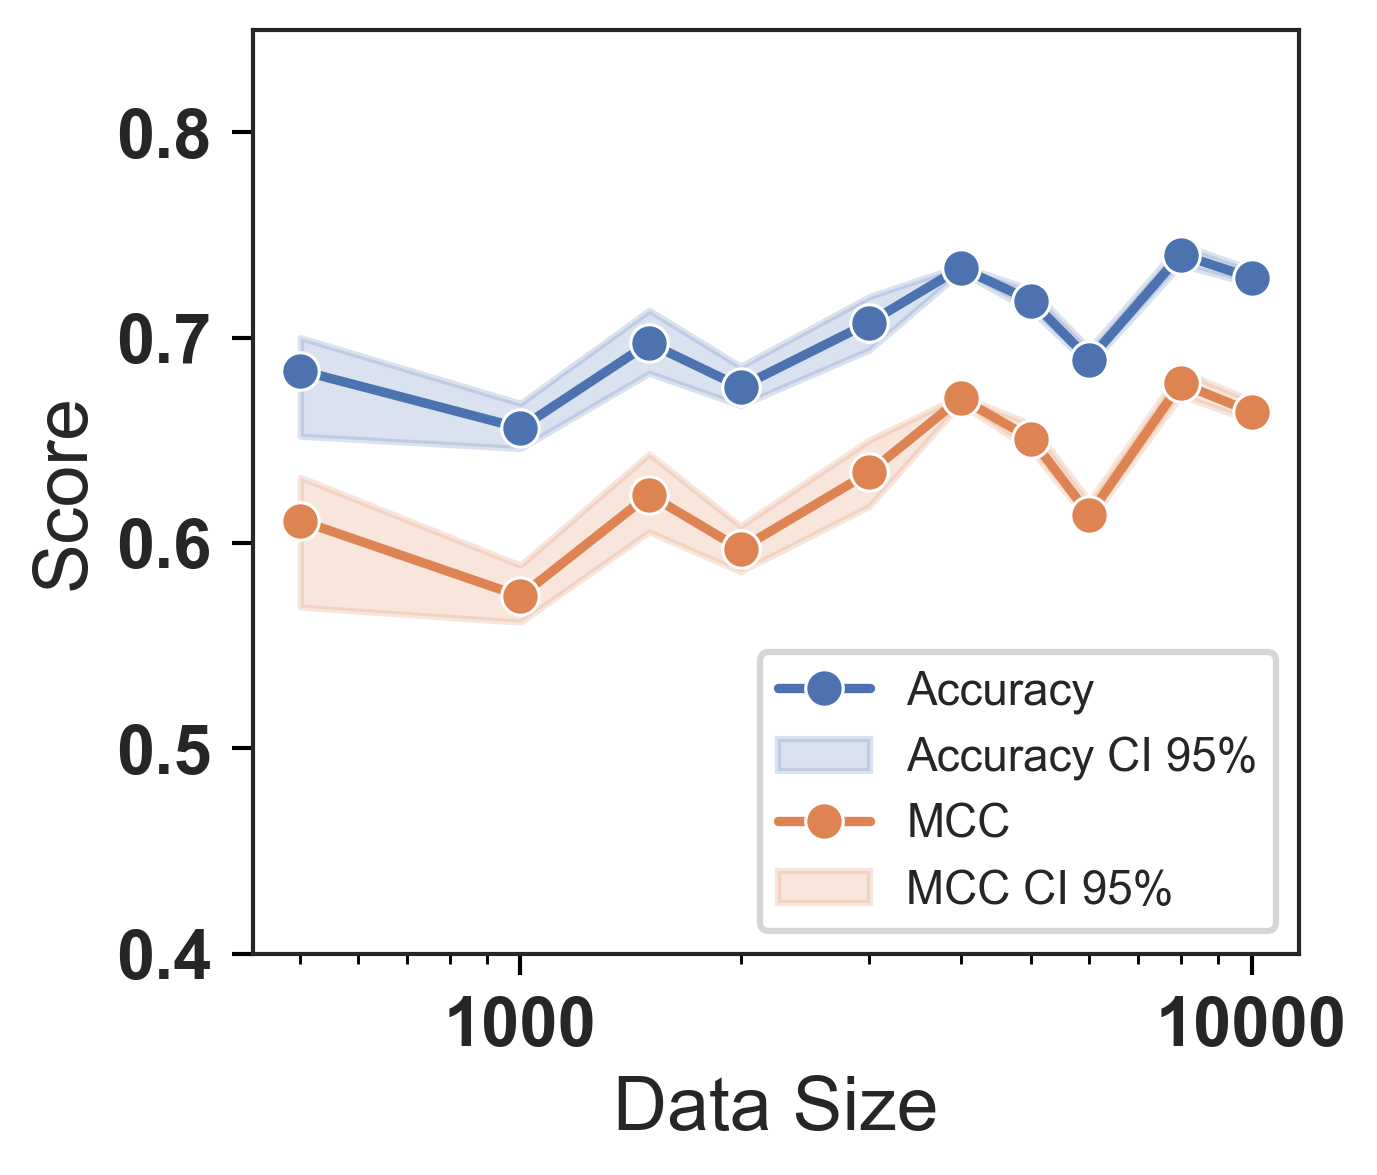

In [13]:
plt.figure(figsize=(4.5, 4), dpi=300)
sns.lineplot(data=test_result_df, x='Data_Size', y='Accuracy', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)
sns.lineplot(data=test_result_df, x='Data_Size', y='MCC', marker='o', 
             errorbar=('ci', 95),
             err_style='band',)

# plt.fill_between
plt.xscale('log')
plt.legend(['Accuracy', 'Accuracy CI 95%', 'MCC', 'MCC CI 95%'], loc='lower right', fontsize=11)
plt.ylim(0.4,0.85)
plt.ylabel('Score')
plt.xlabel('Data Size')
plt.xticks(ticks=[1000, 10000], labels=['1000', '10000'], fontweight='bold')
plt.yticks(ticks=[0.4, 0.5, 0.6, 0.7, 0.8], labels=['0.4', '0.5', '0.6', '0.7', '0.8'], fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1)
ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    length=5,
    width=1,
    color='black',
    pad=5,
    bottom=True,  # Ensure ticks are drawn on the required edges
    left=True,    # Ensure ticks are drawn on the required edges
    top=False,    # Typically, ticks are not shown on the top and right
    right=False   # Color of the ticks (can be adjusted as needed)
)
ax.tick_params(
    axis='x', # Apply only to the X-axis
    which='minor',
    direction='out',
    length=2.5, # Minor ticks are usually shorter than major ticks
    width=0.7,  # Minor ticks are usually thinner than major ticks
    color='black', # Consistent color with major ticks or slightly lighter
    bottom=True,
    top=False
)
plt.show()

## 4. Benchmark with feature (Table S3)

### 4.1 using 4_class
features:
1. tsfresh + raw (we have provided on Zenodo)
2. raw (you might need to train it yourself)
3. tsfresh (you might need to train it yourself)

You can load the results in `feature_test_result.csv` because the size of other models is too large to upload.

In [40]:
# You can skip this cell and use our results in `feature_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)
ag_model_root = './AutogluonModels/'
sp_mode = 's'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column
test_merge_data_nolabel.head()

df_results = pd.DataFrame(columns=['Feature', 'Metrics', 'Score'])
for feat in ['tsfresh_raw', 'raw', 'tsfresh']:
    model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
    predictor = TabularPredictor.load(model_root)
    
    # predict on test data
    y_pred = predictor.predict(test_merge_data_nolabel)
    y_proba = predictor.predict_proba(test_merge_data_nolabel)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    top2_accuracy = top_k_accuracy_score(y_test, y_proba, k=2)
    top3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3)

    df_results.loc[len(df_results)] = [feat, 'Accuracy', accuracy]
    df_results.loc[len(df_results)] = [feat, 'ROC_AUC', roc_auc]
    df_results.loc[len(df_results)] = [feat, 'MCC', mcc]
    df_results.loc[len(df_results)] = [feat, 'F1', f1]
    df_results.loc[len(df_results)] = [feat, 'Precision', precision]
    df_results.loc[len(df_results)] = [feat, 'Recall', recall]
    df_results.loc[len(df_results)] = [feat, 'Top2_Accuracy', top2_accuracy]
    df_results.loc[len(df_results)] = [feat, 'Top3_Accuracy', top3_accuracy]

df_results.to_csv(f'./AutogluonModels/{str(class_num)}_class/feature_test_result.csv', index=False)
df_results

,Feature,Metrics,Score
0,tsfresh_raw,Accuracy,0.807750
1,tsfresh_raw,ROC_AUC,0.958693
2,tsfresh_raw,MCC,0.747151
3,tsfresh_raw,F1,0.802770
4,tsfresh_raw,Precision,0.809195
5,tsfresh_raw,Recall,0.807750
6,tsfresh_raw,Top2_Accuracy,0.983750
7,tsfresh_raw,Top3_Accuracy,1.000000
8,raw,Accuracy,0.789250
9,raw,ROC_AUC,0.952253


(0.7, 1.0)

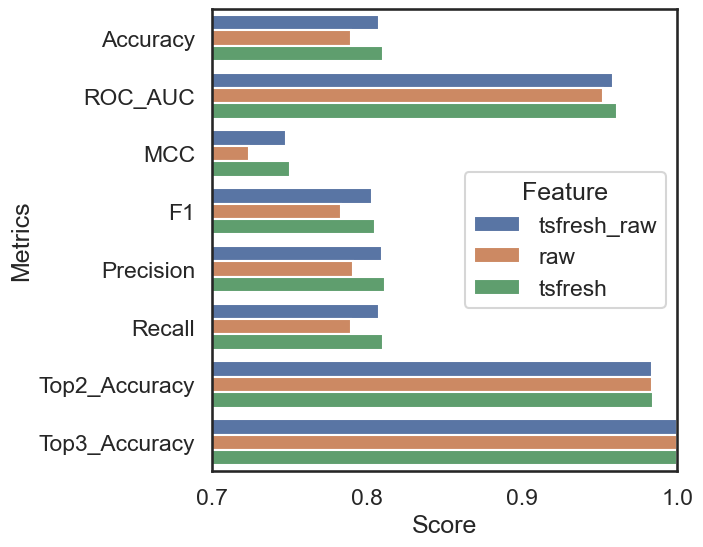

In [43]:
# You can use our results in `feature_test_result.csv` to plot the bar plot

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)

df_results = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/feature_test_result.csv')

fig = plt.figure(figsize=(6, 6))
fig = sns.barplot(data=df_results, x='Score', y='Metrics', hue='Feature', legend=True)
custom_handles = [
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh_raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh'),
]

fig.set_xlim(0.7, 1)

### 4.2 using 5_class
features:
1. tsfresh + raw (we have provided on Zenodo)
2. raw (you might need to train it yourself)
3. tsfresh (you might need to train it yourself)

You can load the results in `feature_test_result.csv` because the size of other models is too large to upload.

In [41]:
# You can skip this cell and use our results in `feature_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)
ag_model_root = './AutogluonModels/'
sp_mode = 's'
ag_train_quality = 'best_quality'
hours = 3.0
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)

test_raw_data.drop(columns=['class'], inplace=True)
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column
test_merge_data_nolabel.head()

df_results = pd.DataFrame(columns=['Feature', 'Metrics', 'Score'])
for feat in ['tsfresh_raw', 'raw', 'tsfresh']:
    model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{hours}h')
    predictor = TabularPredictor.load(model_root)
    
    # predict on test data
    y_pred = predictor.predict(test_merge_data_nolabel)
    y_proba = predictor.predict_proba(test_merge_data_nolabel)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    top2_accuracy = top_k_accuracy_score(y_test, y_proba, k=2)
    top3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3)

    df_results.loc[len(df_results)] = [feat, 'Accuracy', accuracy]
    df_results.loc[len(df_results)] = [feat, 'ROC_AUC', roc_auc]
    df_results.loc[len(df_results)] = [feat, 'MCC', mcc]
    df_results.loc[len(df_results)] = [feat, 'F1', f1]
    df_results.loc[len(df_results)] = [feat, 'Precision', precision]
    df_results.loc[len(df_results)] = [feat, 'Recall', recall]
    df_results.loc[len(df_results)] = [feat, 'Top2_Accuracy', top2_accuracy]
    df_results.loc[len(df_results)] = [feat, 'Top3_Accuracy', top3_accuracy]

df_results.to_csv(f'./AutogluonModels/{str(class_num)}_class/feature_test_result.csv', index=False)
df_results

,Feature,Metrics,Score
0,tsfresh_raw,Accuracy,0.784200
1,tsfresh_raw,ROC_AUC,0.961745
2,tsfresh_raw,MCC,0.732077
3,tsfresh_raw,F1,0.780154
4,tsfresh_raw,Precision,0.783927
5,tsfresh_raw,Recall,0.784200
6,tsfresh_raw,Top2_Accuracy,0.961200
7,tsfresh_raw,Top3_Accuracy,0.990800
8,raw,Accuracy,0.761200
9,raw,ROC_AUC,0.953342


(0.6, 1.0)

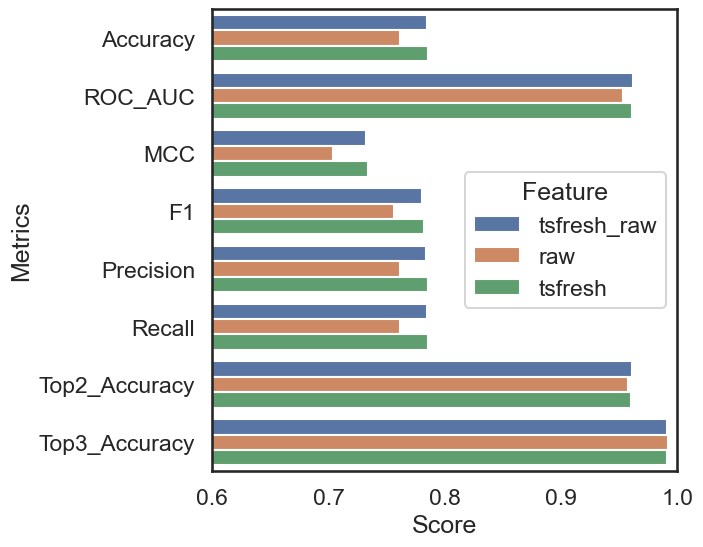

In [45]:
# You can use our results in `feature_test_result.csv` to plot the bar plot

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)
df_results = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/feature_test_result.csv')

fig = plt.figure(figsize=(6, 6))
fig = sns.barplot(data=df_results, x='Score', y='Metrics', hue='Feature', legend=True)

custom_handles = [
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh_raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='raw'),
    plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh'),
]

fig.set_xlim(0.6, 1)

## 5. Benchmark with training time

### 5.1 using 4_class
time:
1. 1.0 hour (you might need to train it yourself)
2. 2.0 hours (you might need to train it yourself)
3. 3.0 hours (we have provided on Zenodo)

You can load the results in `time_test_result.csv` because the size of other models is too large to upload.

In [ ]:
# You can skip this cell and use our results in `time_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)
ag_model_root = './AutogluonModels/'
sp_mode = 's'
ag_train_quality = 'best_quality'
feat = 'tsfresh_raw'
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column
test_merge_data_nolabel.head()

df_results = pd.DataFrame(columns=['Hour', 'Metrics', 'Score'])
for hours in [1.0, 2.0, 3.0]:
    model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{str(hours)}h')
    predictor = TabularPredictor.load(model_root)
    
    # predict on test data
    y_pred = predictor.predict(test_merge_data_nolabel)
    y_proba = predictor.predict_proba(test_merge_data_nolabel)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    top2_accuracy = top_k_accuracy_score(y_test, y_proba, k=2)
    top3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3)

    df_results.loc[len(df_results)] = [hours, 'Accuracy', accuracy]
    df_results.loc[len(df_results)] = [hours, 'ROC_AUC', roc_auc]
    df_results.loc[len(df_results)] = [hours, 'MCC', mcc]
    df_results.loc[len(df_results)] = [hours, 'F1', f1]
    df_results.loc[len(df_results)] = [hours, 'Precision', precision]
    df_results.loc[len(df_results)] = [hours, 'Recall', recall]
    df_results.loc[len(df_results)] = [hours, 'Top2_Accuracy', top2_accuracy]
    df_results.loc[len(df_results)] = [hours, 'Top3_Accuracy', top3_accuracy]

df_results.to_csv(f'./AutogluonModels/{str(class_num)}_class/time_test_result.csv', index=False)
df_results

,Hour,Metrics,Score
0,1.0,Accuracy,0.806500
1,1.0,ROC_AUC,0.960032
2,1.0,MCC,0.745768
3,1.0,F1,0.801021
4,1.0,Precision,0.807767
5,1.0,Recall,0.806500
6,1.0,Top2_Accuracy,0.982750
7,1.0,Top3_Accuracy,1.000000
8,2.0,Accuracy,0.810750
9,2.0,ROC_AUC,0.960046


(0.7, 1.0)

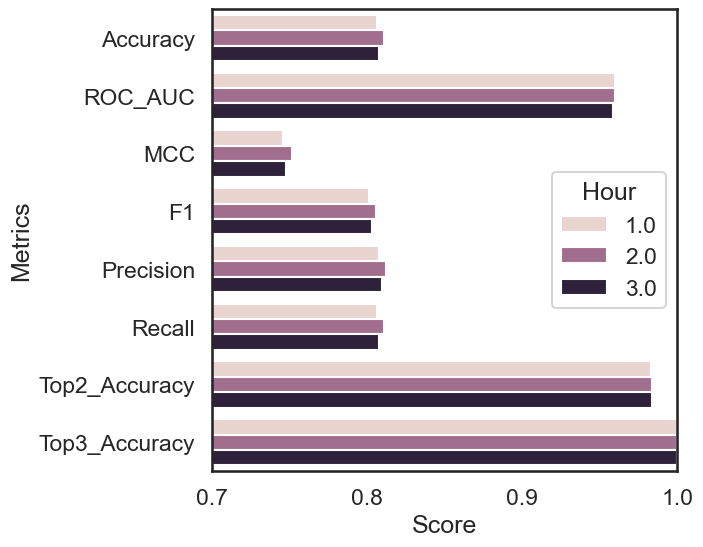

In [46]:
# You can use our results in `time_test_result.csv` to plot the bar plot

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
]
class_num = len(class_list)
df_results = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/time_test_result.csv')  

fig = plt.figure(figsize=(6, 6))
fig = sns.barplot(data=df_results, x='Score', y='Metrics', hue='Hour', legend=True)

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh_raw'),
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='raw'),
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh'),
# ]

fig.set_xlim(0.7, 1)

### 5.2 using 5_class
time:
1. 1.0 hour (you might need to train it yourself)
2. 2.0 hours (you might need to train it yourself)
3. 3.0 hours (we have provided on Zenodo)

You can load the results in `time_test_result.csv` because the size of other models is too large to upload.

In [47]:
# You can skip this cell and use our results in `time_test_result.csv`

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)
ag_model_root = './AutogluonModels/'
sp_mode = 's'
ag_train_quality = 'best_quality'
feat = 'tsfresh_raw'
label_col = 'class'
random_seed = 42

# load test data
test_tsfresh_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test_tsfresh_feat.csv'))
test_raw_data = pd.read_csv(os.path.join(f'data/', f'{str(class_num)}_class', 'test.csv'))
if sp_mode == 's':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('p')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('p')], inplace=True)
elif sp_mode == 'p':
    test_tsfresh_data.drop(columns=[c for c in test_tsfresh_data.columns if c.startswith('s')], inplace=True)
    test_raw_data.drop(columns=[c for c in test_raw_data.columns if c.startswith('s')], inplace=True)
test_raw_data.drop(columns=['class'], inplace=True)
test_merge_data = pd.merge(test_tsfresh_data, test_raw_data, on='id')
test_merge_data.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test = test_merge_data[label_col]
test_merge_data_nolabel = test_merge_data.drop(columns=[label_col])  # delete label column
test_merge_data_nolabel.head()

df_results = pd.DataFrame(columns=['Hour', 'Metrics', 'Score'])
for hours in [1.0, 2.0, 3.0]:
    model_root = os.path.join(ag_model_root, f'{str(class_num)}_class', f'{feat}_feat__{sp_mode}__{ag_train_quality}__{str(hours)}h')
    predictor = TabularPredictor.load(model_root)
    
    # predict on test data
    y_pred = predictor.predict(test_merge_data_nolabel)
    y_proba = predictor.predict_proba(test_merge_data_nolabel)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr")
    mcc = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    top2_accuracy = top_k_accuracy_score(y_test, y_proba, k=2)
    top3_accuracy = top_k_accuracy_score(y_test, y_proba, k=3)

    df_results.loc[len(df_results)] = [hours, 'Accuracy', accuracy]
    df_results.loc[len(df_results)] = [hours, 'ROC_AUC', roc_auc]
    df_results.loc[len(df_results)] = [hours, 'MCC', mcc]
    df_results.loc[len(df_results)] = [hours, 'F1', f1]
    df_results.loc[len(df_results)] = [hours, 'Precision', precision]
    df_results.loc[len(df_results)] = [hours, 'Recall', recall]
    df_results.loc[len(df_results)] = [hours, 'Top2_Accuracy', top2_accuracy]
    df_results.loc[len(df_results)] = [hours, 'Top3_Accuracy', top3_accuracy]

df_results.to_csv(f'./AutogluonModels/{str(class_num)}_class/time_test_result.csv', index=False)
df_results

,Hour,Metrics,Score
0,1.0,Accuracy,0.783200
1,1.0,ROC_AUC,0.960524
2,1.0,MCC,0.730899
3,1.0,F1,0.778874
4,1.0,Precision,0.782604
5,1.0,Recall,0.783200
6,1.0,Top2_Accuracy,0.959200
7,1.0,Top3_Accuracy,0.991600
8,2.0,Accuracy,0.785000
9,2.0,ROC_AUC,0.961473


(0.7, 1.0)

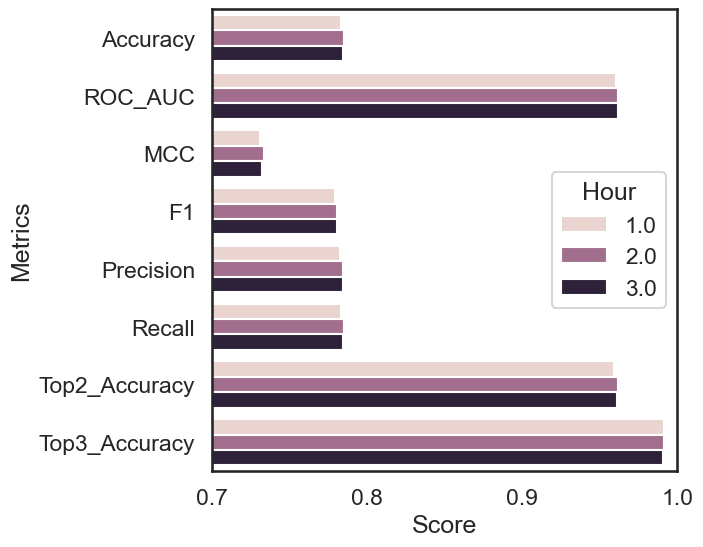

In [49]:
# You can use our results in `time_test_result.csv` to plot the bar plot

class_list = [
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
]
class_num = len(class_list)
df_results = pd.read_csv(f'./AutogluonModels/{str(class_num)}_class/time_test_result.csv')  

fig = plt.figure(figsize=(6, 6))
fig = sns.barplot(data=df_results, x='Score', y='Metrics', hue='Hour', legend=True)

# custom_handles = [
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh_raw'),
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='raw'),
#     plt.Line2D([0], [0], marker='o', markersize=10, linestyle='none', label='tsfresh'),
# ]

fig.set_xlim(0.7, 1)